### Install packages

In [27]:
import numpy as np  # for random number generation
import scipy.stats as ss  # for calculating confidence intervals
import math as math
import matplotlib.pyplot as plt
import pandas as pd
import time
from tqdm import tqdm

### Model parameters

In [28]:
min_bid_cost = 10000
max_bid_cost = 20000
mode_bid_cost = 15000

min_pj_cost = 900000
max_pj_cost = 1100000
mode_pj_cost = 1000000

min_rival_bid = 900000
max_rival_bid = 1800000
mode_rival_bid = 1300000

n_rival, p_rival = 2, 0.5

### Simulation for one price

In [29]:
price = 1100000
num_replications = 5000

In [30]:
np.random.seed(2)
cost_list = []
market_bid_list = []
win_list = []
profit_list = []

for i in tqdm(range(num_replications)):
    
    #use triangular distribution for bid cost
    bid_cost = np.random.triangular(min_bid_cost, mode_bid_cost, max_bid_cost, 1)

    #use triangular distribution for project cost
    pj_cost = np.random.triangular(min_pj_cost, mode_pj_cost, max_pj_cost, 1)
    
    # market conditions
    num_rival = np.random.binomial(n_rival,p_rival) + 1
    mkt_bid = min(np.random.triangular(min_rival_bid, mode_rival_bid, max_rival_bid, num_rival))
    
    # win or not 
    win = 0
    if price < mkt_bid:
        win = win + 1
        total_cost = float(bid_cost + pj_cost)
        profit = price - total_cost
    else: 
        total_cost = float(bid_cost)
        profit = - total_cost
    
    cost_list.append(total_cost)
    market_bid_list.append(mkt_bid)
    win_list.append(win)
    profit_list.append(profit)
    

100%|████████████████████████████████████| 5000/5000 [00:00<00:00, 25453.81it/s]


In [31]:
price_cost = np.average(cost_list)
price_win = np.average(win_list)
price_profit = np.average(profit_list)

Text(0, 0.5, 'Counts')

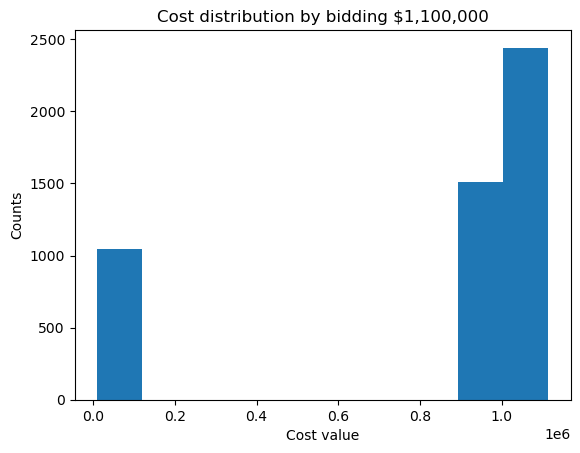

In [32]:
plt.hist(cost_list)
plt.title('Cost distribution by bidding $1,100,000')
plt.xlabel('Cost value')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

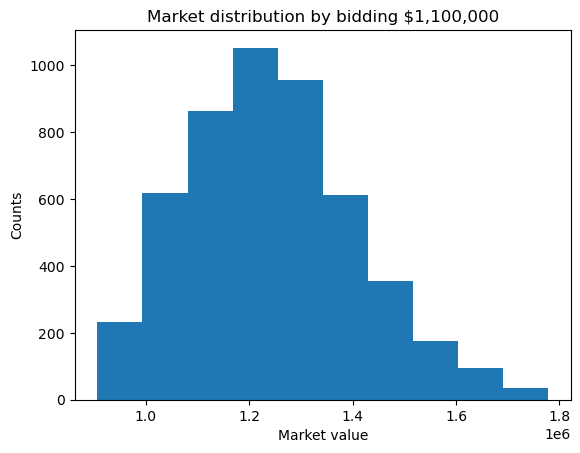

In [33]:
plt.hist(market_bid_list)
plt.title('Market distribution by bidding $1,100,000')
plt.xlabel('Market value')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

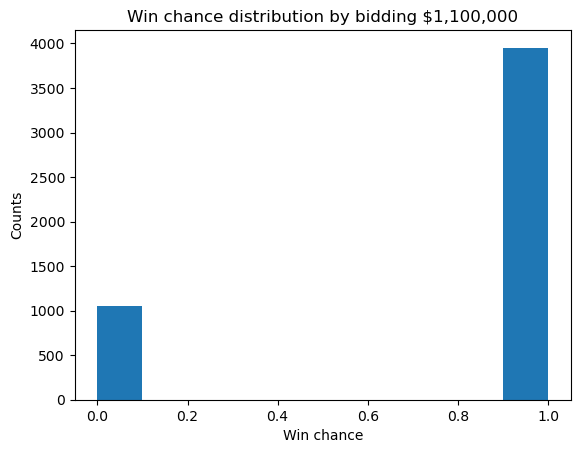

In [34]:
plt.hist(win_list)
plt.title('Win chance distribution by bidding $1,100,000')
plt.xlabel('Win chance')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

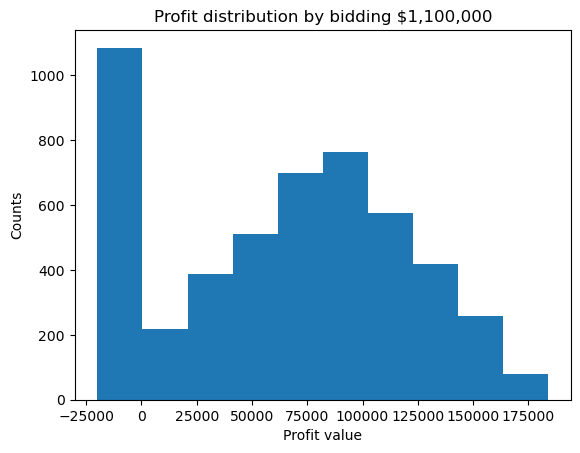

In [35]:
plt.hist(profit_list)
plt.title('Profit distribution by bidding $1,100,000')
plt.xlabel('Profit value')
plt.ylabel('Counts')

In [36]:
print('By bidding ${price}, the chance of winning is {chance} at the cost of ${cost} with the profit of ${profit}'.format(price = price, chance = price_win, cost = price_cost, profit = price_profit))

By bidding $1100000, the chance of winning is 0.7904 at the cost of $805524.6309630858 with the profit of $63915.369036914286


### Simulation for different prices

In [37]:
lower_bid = 850000
upper_bid = 1900000
search_step = 1000

In [38]:
np.random.seed(2)
average_cost_list = []
average_market_bid_list = []
average_win_list = []
average_profit_list = []
std_profit_list = []
price_list = []

for price in tqdm(range(lower_bid,upper_bid,search_step)):

    cost_list = []
    market_bid_list = []
    win_list = []
    profit_list = []

    for i in range(num_replications):

        #use triangular distribution for bid cost
        bid_cost = np.random.triangular(min_bid_cost, mode_bid_cost, max_bid_cost, 1)

        #use triangular distribution for project cost
        pj_cost = np.random.triangular(min_pj_cost, mode_pj_cost, max_pj_cost, 1)

        # market conditions
        num_rival = np.random.binomial(n_rival,p_rival) + 1
        mkt_bid = min(np.random.triangular(min_rival_bid, mode_rival_bid, max_rival_bid, num_rival))

        # win or not 
        if price < mkt_bid:
            win = 1
            total_cost = float(bid_cost + pj_cost*win)
            profit = price*win - total_cost
        else: 
            win = 0
            total_cost = float(bid_cost + pj_cost*win)
            profit = price*win - total_cost

        cost_list.append(total_cost)
        market_bid_list.append(mkt_bid)
        win_list.append(win)
        profit_list.append(profit)
        
        #end for num_rep
        
    price_list.append(price)
    average_cost_list.append(np.average(cost_list))
    average_market_bid_list.append(np.average(market_bid_list))
    average_win_list.append(np.average(win_list))
    average_profit_list.append(np.average(profit_list))
    std_profit_list.append(np.std(profit_list))
    
    
    

100%|███████████████████████████████████████| 1050/1050 [02:04<00:00,  8.45it/s]


Text(0, 0.5, 'Counts')

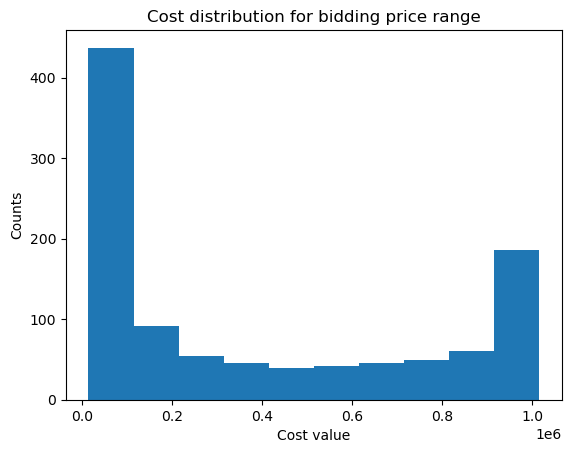

In [39]:
plt.hist(average_cost_list)
plt.title('Cost distribution for bidding price range')
plt.xlabel('Cost value')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

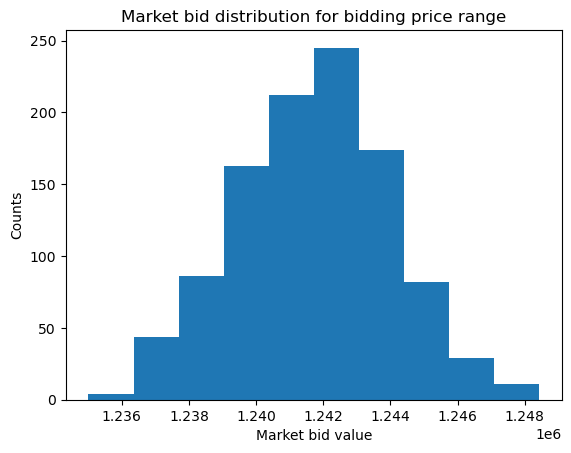

In [40]:
plt.hist(average_market_bid_list)
plt.title('Market bid distribution for bidding price range')
plt.xlabel('Market bid value')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

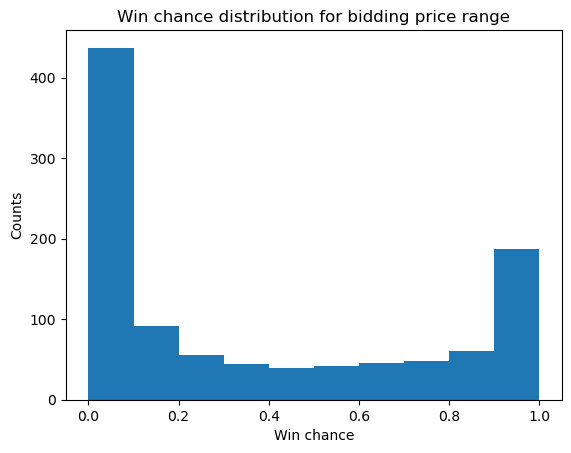

In [41]:
plt.hist(average_win_list)
plt.title('Win chance distribution for bidding price range')
plt.xlabel('Win chance')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

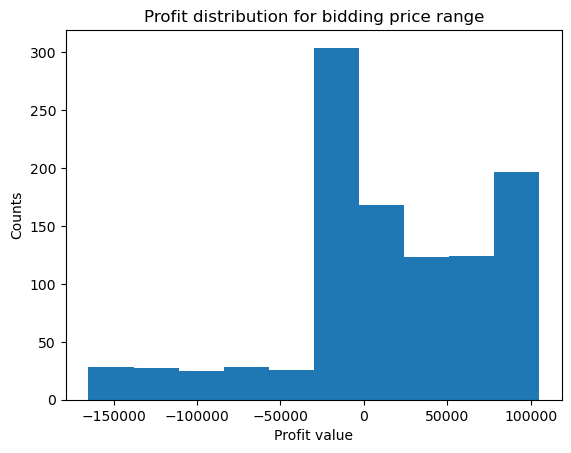

In [42]:
plt.hist(average_profit_list)
plt.title('Profit distribution for bidding price range')
plt.xlabel('Profit value')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

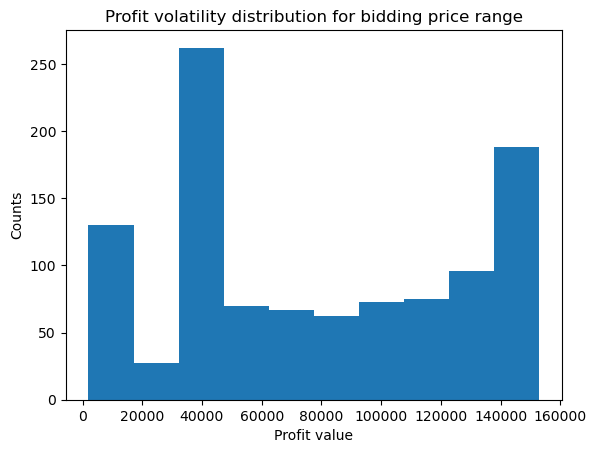

In [43]:
plt.hist(std_profit_list)
plt.title('Profit volatility distribution for bidding price range')
plt.xlabel('Profit value')
plt.ylabel('Counts')

/var/folders/yt/b9xrr1x953g19fj3s6yzr4tm0000gn/T/ipykernel_11681/757377094.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(price_list, average_win_list, 'r', color = 'blue')


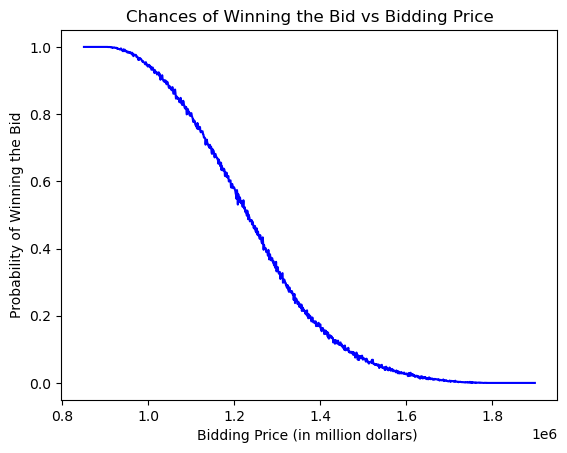

In [44]:
plt.clf()

plt.plot(price_list, average_win_list, 'r', color = 'blue')

plt.title('Chances of Winning the Bid vs Bidding Price')
plt.xlabel('Bidding Price (in million dollars) ')
plt.ylabel('Probability of Winning the Bid')
plt.show()

/var/folders/yt/b9xrr1x953g19fj3s6yzr4tm0000gn/T/ipykernel_4913/3737715193.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(price_list, average_profit_list, 'r', color = 'blue')


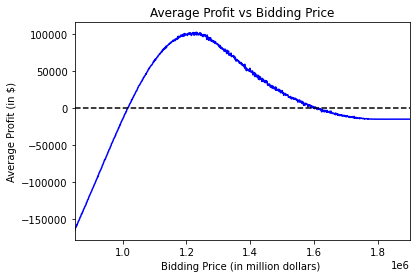

In [22]:
plt.clf()

plt.plot(price_list, average_profit_list, 'r', color = 'blue')

plt.axhline(y=0, color='black', linestyle='--')

plt.xlim(850000,1900000)
#plt.ylim(-300000,120000)

plt.title('Average Profit vs Bidding Price')
plt.xlabel('Bidding Price (in million dollars) ')
plt.ylabel('Average Profit (in $)')

plt.show()

/var/folders/yt/b9xrr1x953g19fj3s6yzr4tm0000gn/T/ipykernel_4913/3516659117.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(average_profit_list, average_win_list, 'r', color = 'blue')


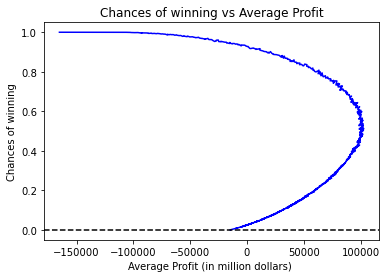

In [23]:
plt.clf()

plt.plot(average_profit_list, average_win_list, 'r', color = 'blue')

plt.axhline(y=0, color='black', linestyle='--')

plt.title('Chances of winning vs Average Profit')
plt.xlabel('Average Profit (in million dollars) ')
plt.ylabel('Chances of winning')

plt.show()

/var/folders/yt/b9xrr1x953g19fj3s6yzr4tm0000gn/T/ipykernel_4913/1354864879.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(average_profit_list, std_profit_list, 'r', color = 'blue')


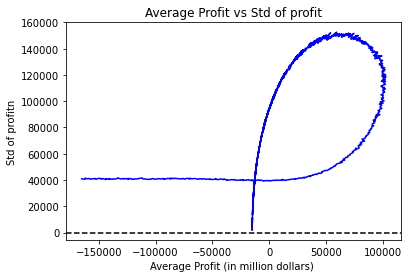

In [24]:
plt.clf()

plt.plot(average_profit_list, std_profit_list, 'r', color = 'blue')

plt.axhline(y=0, color='black', linestyle='--')

plt.title('Average Profit vs Std of profit')
plt.xlabel('Average Profit (in million dollars) ')
plt.ylabel('Std of profitn')

plt.show()

In [25]:
# create a dictionary with the lists
data = {
    'Price': price_list,
    'Average Cost': average_cost_list,
    'Average Market Bid': average_market_bid_list,
    'Average Win': average_win_list,
    'Average Profit': average_profit_list,
    'Std Dev Profit': std_profit_list
}

# create a dataframe from the dictionary
simulations = pd.DataFrame(data)

# save the dataframe as a CSV file
simulations.to_csv('simulations.csv', index=False)


## Solving for maximum expected profit

In [26]:
# find the index of the maximum value in average_profit_list
max_profit_index = np.argmax(average_profit_list)

# retrieve the corresponding value from price_list
price_for_max_profit = price_list[max_profit_index]

print("Price for maximum profit:", price_for_max_profit)


Price for maximum profit: 1230000


In [27]:
# retrieve the corresponding value from average_win_list
win_for_max_profit = average_win_list[max_profit_index]

print("Win for maximum profit:", win_for_max_profit)


Win for maximum profit: 0.5128


In [28]:
profit_for_max_profit = average_profit_list[max_profit_index]

print("Maximum profit:", profit_for_max_profit)


Maximum profit: 102826.96525379959


In [29]:
# Reverse testing

price = price_for_max_profit

np.random.seed(2)

cost_list = []
market_bid_list = []
win_list = []
profit_list = []

for i in range(num_replications):
    
    #use triangular distribution for bid cost
    bid_cost = np.random.triangular(min_bid_cost, mode_bid_cost, max_bid_cost, 1)

    #use triangular distribution for project cost
    pj_cost = np.random.triangular(min_pj_cost, mode_pj_cost, max_pj_cost, 1)
    
    # market conditions
    num_rival = np.random.binomial(n_rival,p_rival) + 1
    mkt_bid = min(np.random.triangular(min_rival_bid, mode_rival_bid, max_rival_bid, num_rival))
    
    # win or not 
    win = 0
    if price < mkt_bid:
        win = win + 1
        total_cost = float(bid_cost + pj_cost)
        profit = price - total_cost
    else: 
        total_cost = float(bid_cost)
        profit = - total_cost
    
    cost_list.append(total_cost)
    market_bid_list.append(mkt_bid)
    win_list.append(win)
    profit_list.append(profit)

(array([4977.,    0.,    0.,    0.,  251.,  828., 1360., 1418.,  872.,
         294.]),
 array([-19936.48290934,  13513.45901555,  46963.40094044,  80413.34286533,
        113863.28479022, 147313.22671511, 180763.16864   , 214213.11056489,
        247663.05248978, 281112.99441467, 314562.93633956]),
 <BarContainer object of 10 artists>)

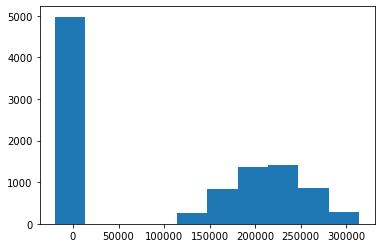

In [30]:
plt.hist(profit_list)

In [53]:
np.mean(profit_list)

17126.165594751263

In [31]:
np.average(win_list)

0.5023

In [32]:
np.average(market_bid_list)

1243084.13843003

In [33]:
np.std(market_bid_list)

163249.17374204844

(array([ 483., 1246., 1786., 2145., 1895., 1183.,  683.,  349.,  177.,
          53.]),
 array([ 905558.26636206,  993976.59969293, 1082394.93302381,
        1170813.26635468, 1259231.59968555, 1347649.93301643,
        1436068.2663473 , 1524486.59967818, 1612904.93300905,
        1701323.26633993, 1789741.5996708 ]),
 <BarContainer object of 10 artists>)

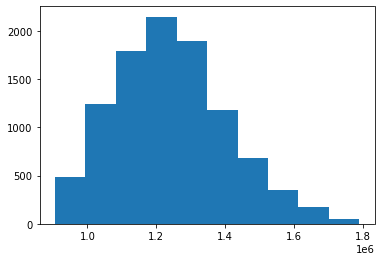

In [34]:
plt.hist(market_bid_list)

## Solving for expected chance of winning

### Chances of winning close to 70%

In [35]:
data = {
    'Price': price_list,
    'Average Cost': average_cost_list,
    'Average Market Bid': average_market_bid_list,
    'Average Win': average_win_list,
    'Average Profit': average_profit_list
}

# create a dataframe from the dictionary
df = pd.DataFrame(data)

# find the index of the closest element to 0.70 in the Average Win column
index = np.abs(df['Average Win'] - .70).idxmin()

# extract the corresponding value from the price list
price = price_list[index]

print("The value from price_list that is closest to 0.70 in average_win_list is:", price)

The value from price_list that is closest to 0.70 in average_win_list is: 1146000


In [36]:
# Reverse testing

np.random.seed(2)

cost_list = []
market_bid_list = []
win_list = []
profit_list = []

for i in range(num_replications):
    
    #use triangular distribution for bid cost
    bid_cost = np.random.triangular(min_bid_cost, mode_bid_cost, max_bid_cost, 1)

    #use triangular distribution for project cost
    pj_cost = np.random.triangular(min_pj_cost, mode_pj_cost, max_pj_cost, 1)
    
    # market conditions
    num_rival = np.random.binomial(n_rival,p_rival) + 1
    mkt_bid = min(np.random.triangular(min_rival_bid, mode_rival_bid, max_rival_bid, num_rival))
    
    # win or not 
    win = 0
    if price < mkt_bid:
        win = win + 1
        total_cost = float(bid_cost + pj_cost)
        profit = price - total_cost
    else: 
        total_cost = float(bid_cost)
        profit = - total_cost
    
    cost_list.append(total_cost)
    market_bid_list.append(mkt_bid)
    win_list.append(win)
    profit_list.append(profit)

(array([2939.,    0.,  206.,  649., 1094., 1515., 1565., 1101.,  694.,
         237.]),
 array([-19936.48290934,   5113.45901555,  30163.40094044,  55213.34286533,
         80263.28479022, 105313.22671511, 130363.16864   , 155413.11056489,
        180463.05248978, 205512.99441467, 230562.93633956]),
 <BarContainer object of 10 artists>)

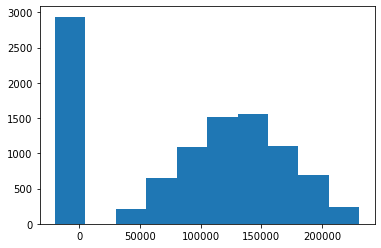

In [37]:
plt.hist(profit_list)

In [38]:
np.average(profit_list)

88242.16424594849

In [39]:
np.average(win_list)

0.7061

### Chances of winning close to 80%

In [40]:
data = {
    'Price': price_list,
    'Average Cost': average_cost_list,
    'Average Market Bid': average_market_bid_list,
    'Average Win': average_win_list,
    'Average Profit': average_profit_list
}

# create a dataframe from the dictionary
df = pd.DataFrame(data)

# find the index of the closest element to 0.80 in the Average Win column
index = np.abs(df['Average Win'] - .80).idxmin()

# extract the corresponding value from the price list
price = price_list[index]

print("The value from price_list that is closest to 0.80 in average_win_list is:", price)


The value from price_list that is closest to 0.80 in average_win_list is: 1099000


In [41]:
# Reverse testing

np.random.seed(2)

cost_list = []
market_bid_list = []
win_list = []
profit_list = []

for i in range(num_replications):
    
    #use triangular distribution for bid cost
    bid_cost = np.random.triangular(min_bid_cost, mode_bid_cost, max_bid_cost, 1)

    #use triangular distribution for project cost
    pj_cost = np.random.triangular(min_pj_cost, mode_pj_cost, max_pj_cost, 1)
    
    # market conditions
    num_rival = np.random.binomial(n_rival,p_rival) + 1
    mkt_bid = min(np.random.triangular(min_rival_bid, mode_rival_bid, max_rival_bid, num_rival))
    
    # win or not 
    win = 0
    if price < mkt_bid:
        win = win + 1
        total_cost = float(bid_cost + pj_cost)
        profit = price - total_cost
    else: 
        total_cost = float(bid_cost)
        profit = - total_cost
    
    cost_list.append(total_cost)
    market_bid_list.append(mkt_bid)
    win_list.append(win)
    profit_list.append(profit)

(array([2137.,  464.,  765., 1080., 1399., 1500., 1142.,  826.,  531.,
         156.]),
 array([-19936.48290934,    413.45901555,  20763.40094044,  41113.34286533,
         61463.28479022,  81813.22671511, 102163.16864   , 122513.11056489,
        142863.05248978, 163212.99441467, 183562.93633956]),
 <BarContainer object of 10 artists>)

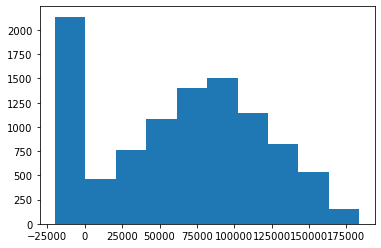

In [42]:
plt.hist(profit_list)

In [43]:
np.average(profit_list)

63670.48769476881

In [44]:
np.average(win_list)

0.7955

### Chances of winning close to 90%

In [45]:
data = {
    'Price': price_list,
    'Average Cost': average_cost_list,
    'Average Market Bid': average_market_bid_list,
    'Average Win': average_win_list,
    'Average Profit': average_profit_list
}

# create a dataframe from the dictionary
df = pd.DataFrame(data)

# find the index of the closest element to 0.90 in the Average Win column
index = np.abs(df['Average Win'] - .90).idxmin()

# extract the corresponding value from the price list
price = price_list[index]

print("The value from price_list that is closest to 0.90 in average_win_list is:", price)


The value from price_list that is closest to 0.90 in average_win_list is: 1036000


In [46]:
# Reverse testing

np.random.seed(2)

cost_list = []
market_bid_list = []
win_list = []
profit_list = []

for i in range(num_replications):
    
    #use triangular distribution for bid cost
    bid_cost = np.random.triangular(min_bid_cost, mode_bid_cost, max_bid_cost, 1)

    #use triangular distribution for project cost
    pj_cost = np.random.triangular(min_pj_cost, mode_pj_cost, max_pj_cost, 1)
    
    # market conditions
    num_rival = np.random.binomial(n_rival,p_rival) + 1
    mkt_bid = min(np.random.triangular(min_rival_bid, mode_rival_bid, max_rival_bid, num_rival))
    
    # win or not 
    win = 0
    if price < mkt_bid:
        win = win + 1
        total_cost = float(bid_cost + pj_cost)
        profit = price - total_cost
    else: 
        total_cost = float(bid_cost)
        profit = - total_cost
    
    cost_list.append(total_cost)
    market_bid_list.append(mkt_bid)
    win_list.append(win)
    profit_list.append(profit)

(array([ 158.,  575.,  904., 2236., 1587., 1662., 1236.,  912.,  559.,
         171.]),
 array([-79515.86993246, -59507.98930525, -39500.10867805, -19492.22805085,
           515.65257635,  20523.53320355,  40531.41383076,  60539.29445796,
         80547.17508516, 100555.05571236, 120562.93633956]),
 <BarContainer object of 10 artists>)

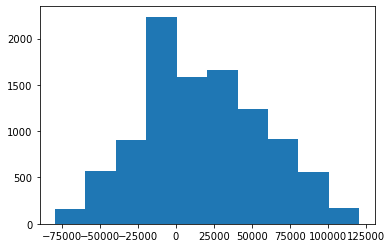

In [47]:
plt.hist(profit_list)

In [48]:
np.average(profit_list)

17126.165594751263

In [49]:
np.average(win_list)

0.9004